In [1]:
from torchvision import models

In [2]:
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

C:\Users\vallu.jayanth\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\vallu.jayanth\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FCN_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to C:\Users\vallu.jayanth/.cache\torch\hub\checkpoints\fcn_resnet101_coco-7ecb50ca.pth


  0%|          | 0.00/208M [00:00<?, ?B/s]

In [5]:
!pip install wget

In [9]:
pwd

'C:\\Users\\vallu.jayanth'

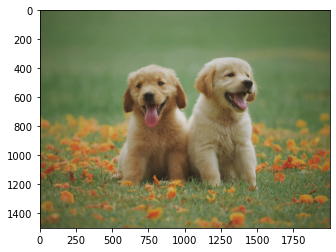

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
import torch

img = Image.open('./Dog.png')
plt.imshow(img); plt.show()

In [16]:
import torchvision.transforms as T
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

In [17]:
inp

tensor([[[[-0.4739, -0.4739, -0.4739,  ..., -0.5596, -0.5596, -0.5767],
          [-0.4739, -0.4739, -0.4739,  ..., -0.5596, -0.5596, -0.5767],
          [-0.4739, -0.4739, -0.4568,  ..., -0.5596, -0.5596, -0.5596],
          ...,
          [-0.4054, -0.4226, -0.4054,  ..., -0.6452, -0.5424, -0.4911],
          [-0.4911, -0.4568, -0.3369,  ..., -0.6109, -0.5938, -0.6109],
          [-0.5938, -0.4226, -0.1999,  ..., -0.5082, -0.6109, -0.6452]],

         [[ 0.0826,  0.0826,  0.0826,  ..., -0.0049, -0.0049, -0.0224],
          [ 0.0826,  0.0826,  0.0826,  ..., -0.0049, -0.0049, -0.0224],
          [ 0.0826,  0.0826,  0.1001,  ..., -0.0049, -0.0049, -0.0049],
          ...,
          [-0.1450, -0.1450, -0.1450,  ..., -0.2150, -0.1275, -0.0749],
          [-0.1800, -0.1625, -0.1450,  ..., -0.2150, -0.1975, -0.2150],
          [-0.2325, -0.1800, -0.1625,  ..., -0.1625, -0.2150, -0.2500]],

         [[-0.4450, -0.4450, -0.4450,  ..., -0.5321, -0.5321, -0.5495],
          [-0.4450, -0.4450, -

In [18]:
inp.shape

torch.Size([1, 3, 224, 224])

In [19]:
output = fcn(inp)

In [20]:
output

OrderedDict([('out',
              tensor([[[[ 9.6869,  9.6869,  9.6869,  ...,  9.3662,  9.3662,  9.3662],
                        [ 9.6869,  9.6869,  9.6869,  ...,  9.3662,  9.3662,  9.3662],
                        [ 9.6869,  9.6869,  9.6869,  ...,  9.3662,  9.3662,  9.3662],
                        ...,
                        [ 9.3759,  9.3759,  9.3759,  ...,  9.5857,  9.5857,  9.5857],
                        [ 9.3759,  9.3759,  9.3759,  ...,  9.5857,  9.5857,  9.5857],
                        [ 9.3759,  9.3759,  9.3759,  ...,  9.5857,  9.5857,  9.5857]],
              
                       [[-1.7568, -1.7568, -1.7568,  ..., -0.9440, -0.9440, -0.9440],
                        [-1.7568, -1.7568, -1.7568,  ..., -0.9440, -0.9440, -0.9440],
                        [-1.7568, -1.7568, -1.7568,  ..., -0.9440, -0.9440, -0.9440],
                        ...,
                        [-1.4009, -1.4009, -1.4009,  ..., -1.9147, -1.9147, -1.9147],
                        [-1.4009, -1.4009, -1

In [21]:
out = output["out"]
out.shape

torch.Size([1, 21, 224, 224])

In [22]:
import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)
print (np.unique(om))

(224, 224)
[ 0 12]


In [23]:
# Define the helper function
def decode_segmap(image, nc=21):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

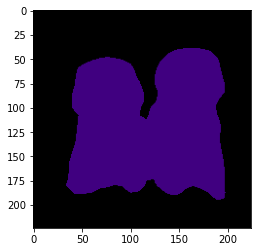

In [24]:
rgb = decode_segmap(om)
plt.imshow(rgb); plt.show()

In [25]:
def segment(net, path, show_orig=True, dev='cuda'):
  img = Image.open(path)
  if show_orig: plt.imshow(img); plt.axis('off'); plt.show()
  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([T.Resize(640), 
                   #T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0).to(dev)
  out = net.to(dev)(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  plt.imshow(rgb); plt.axis('off'); plt.show()